<H1>FittingDistance</H1>

In [1]:
%pylab inline
import numpy as np
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


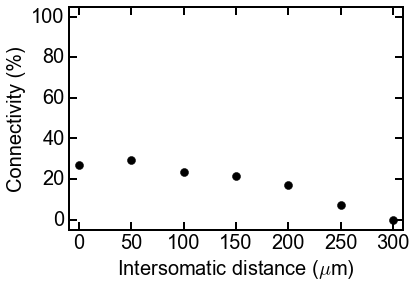

In [3]:
# Load and plot data
xdata, ydata = np.loadtxt('IEprob.dist', comments='//', unpack=1)
plt.plot(xdata, ydata, 'ko', markersize=8);
plt.ylim(-5,105), plt.xlim (-10, 310)
plt.xlabel('Intersomatic distance ($\mu$m)');
plt.ylabel('Connectivity (%)');

<H2>Fitting to a monoexponential function</H2>

In [4]:
# define the fitting function
def mymonoexp(x, Amp, tau):
    """
    solves for the following function:
    f(x; Amp, tau, c )= Amp * exp( -x/tau )
    
    where x is the independent variable
    Amp is the amplitude
    tau is the distance constant (1/ distance constant,tau)
    
    """
    return Amp*np.exp(-x/tau)

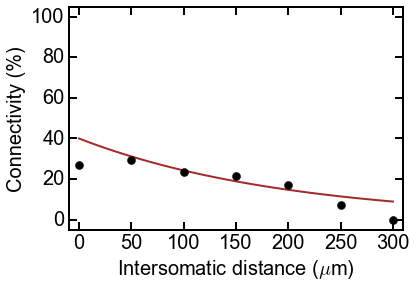

In [5]:
# plot a suggestion with data
x = np.linspace(0, 300, 100)
y = mymonoexp(x, Amp = 40, tau = 200)
plt.plot(x,y, color='brown');


xdata, ydata = np.loadtxt('IEprob.dist', comments='//', unpack=1)
plt.plot(xdata, ydata, 'ko', markersize=8);
plt.ylim(-5,105), plt.xlim (-10, 310)
plt.xlabel('Intersomatic distance ($\mu$m)');
plt.ylabel('Connectivity (%)');


In [6]:
# perform best fit
# fit to the function
pinit = [40, 200]
popt, pcov = curve_fit(mymonoexp, xdata, ydata, p0 = pinit)
 
myamp = popt[0]
mytau = popt[1]


print('Amp = %2.4f'%myamp)
print('tau = %2.4f'%mytau)

Amp = 32.1212
tau = 228.7038


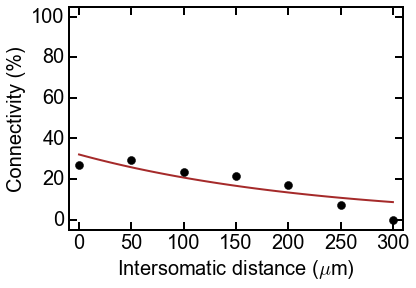

In [7]:
# plot fit and data together
# plot a suggestion with data
xfit = np.linspace(0, 300, 100)
yfit = mymonoexp(x, Amp = myamp, tau = mytau)
plt.plot(xfit,yfit, color='brown');


xdata, ydata = np.loadtxt('IEprob.dist', comments='//', unpack=1)
plt.plot(xdata, ydata, 'ko', markersize=8);
plt.ylim(-5,105), plt.xlim (-10, 310)
plt.xlabel('Intersomatic distance ($\mu$m)');
plt.ylabel('Connectivity (%)');